In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import datetime

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv', 
                header=None,
                )

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
0,NaN,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
1,Apple,0.5799999999999841,-0.22000499999998624,-3.4099980000000016,-1.1699999999999875,1.680010999999979,-2.6899940000000413,-1.4699939999999856,2.7799970000000087,-0.6800029999999708,...,0.320007999999973,4.519996999999989,2.89998700000001,9.59001900000004,-6.540016000000037,5.959975999999983,6.910011000000054,-5.359961999999996,0.8400189999999839,-19.589980999999966
2,AIG,-0.6400020000000026,-0.6500000000000021,-0.21000100000000188,-0.4200000000000017,0.7100010000000019,-0.20000100000000032,-1.130001,0.06999899999999926,-0.11999899999999641,...,0.9199979999999925,0.7099990000000034,0.11999899999999997,-0.4799999999999969,0.010002000000007172,-0.279997999999992,-0.19000300000000436,-0.04000099999999662,-0.40000200000000063,0.6599999999999966
3,Amazon,-2.3500060000000076,1.2600089999999966,-2.3500060000000076,-2.0099950000000035,2.960005999999993,-2.3099969999999814,-1.640006999999997,1.2099990000000105,-1.7900009999999895,...,2.1099849999999947,3.699982000000034,9.57000800000003,-3.4500130000000127,4.82000800000003,-4.079985999999963,2.5799860000000194,4.790008999999998,-1.7600089999999682,3.740021000000013
4,American express,0.1099969999999999,0.0,0.26000200000000717,0.7200020000000009,0.19000300000000436,-0.2700010000000006,0.75,0.30000400000000127,0.639998999999996,...,0.6800009999999901,2.2900009999999895,0.4099960000000067,-0.0699989999999957,0.10000599999999338,0.06999900000000991,0.13000499999999704,1.8499989999999968,0.04000100000000373,0.5400010000000037
5,Boeing,0.45999899999999627,1.7700000000000031,1.5499989999999997,2.6900030000000044,0.05999699999999564,-1.0800020000000004,0.35999999999999943,0.5499989999999926,0.5300020000000032,...,1.5599969999999956,2.4800030000000106,0.019997000000003595,-1.2200010000000105,0.4800029999999964,3.020004,-0.02999900000000366,1.9400019999999927,1.1300050000000113,0.3099980000000073
6,Bank of America,0.4499999999999993,0.4600010000000001,0.17999999999999972,0.25,-0.19999899999999826,-0.05999999999999872,-0.3599979999999974,0.1900010000000023,0.1900010000000023,...,0.2400000000000002,0.21000000000000085,-0.049999999999998934,-0.009999999999999787,-0.030000000000001137,-0.23999999999999844,0.05000000000000071,0.10999999999999943,-0.05999999999999872,-0.10999999999999943
7,British American Tobacco,0.1799999999999926,0.22000100000001055,0.04000100000000373,0.25,-0.3600009999999969,-0.09999900000001105,0.5699999999999932,-0.1399990000000031,0.26000200000000007,...,0.22000099999999634,2.25,0.47000099999999634,0.3199999999999932,-0.04000100000000373,-0.4300000000000068,-0.019996999999989384,-0.1299980000000005,0.33000199999999325,1.1500010000000032
8,Canon,0.7299999999999969,0.36999899999999997,-0.09999899999999684,-0.16999899999999712,0.030003000000007773,0.11000100000000401,-0.07999799999999624,0.14000000000000057,0.3899990000000031,...,0.20999899999999627,0.5600020000000008,0.06999900000000281,0.11999899999999997,0.050003000000003794,-0.4599990000000034,0.25999799999999595,-0.1099989999999984,0.09000100000000089,-0.1100009999999969
9,Caterpillar,0.899996999999999,0.7000010000000003,0.25,0.36999899999999997,1.0900000000000034,3.1799960000000027,-0.7699959999999919,0.23000400000000099,-0.11999800000000249,...,0.20999900000001048,0.5199959999999919,1.0299980000000062,-0.020004000000000133,1.2900009999999895,-0.39000000000000057,1.2099990000000105,0.4499970000000104,-0.22000099999999634,0.15999599999999248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 964 entries, 0 to 963
dtypes: object(964)
memory usage: 459.5+ KB


In [5]:
df.columns = df.iloc[0,:]
df.head()

,NaN,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,NaN,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
1,Apple,0.5799999999999841,-0.22000499999998624,-3.4099980000000016,-1.1699999999999875,1.680010999999979,-2.6899940000000413,-1.4699939999999856,2.7799970000000087,-0.6800029999999708,...,0.320007999999973,4.519996999999989,2.89998700000001,9.59001900000004,-6.540016000000037,5.959975999999983,6.910011000000054,-5.359961999999996,0.8400189999999839,-19.589980999999966
2,AIG,-0.6400020000000026,-0.6500000000000021,-0.21000100000000188,-0.4200000000000017,0.7100010000000019,-0.20000100000000032,-1.130001,0.06999899999999926,-0.11999899999999641,...,0.9199979999999925,0.7099990000000034,0.11999899999999997,-0.4799999999999969,0.010002000000007172,-0.279997999999992,-0.19000300000000436,-0.04000099999999662,-0.40000200000000063,0.6599999999999966
3,Amazon,-2.3500060000000076,1.2600089999999966,-2.3500060000000076,-2.0099950000000035,2.960005999999993,-2.3099969999999814,-1.640006999999997,1.2099990000000105,-1.7900009999999895,...,2.1099849999999947,3.699982000000034,9.57000800000003,-3.4500130000000127,4.82000800000003,-4.079985999999963,2.5799860000000194,4.790008999999998,-1.7600089999999682,3.740021000000013
4,American express,0.1099969999999999,0.0,0.26000200000000717,0.7200020000000009,0.19000300000000436,-0.2700010000000006,0.75,0.30000400000000127,0.639998999999996,...,0.6800009999999901,2.2900009999999895,0.4099960000000067,-0.0699989999999957,0.10000599999999338,0.06999900000000991,0.13000499999999704,1.8499989999999968,0.04000100000000373,0.5400010000000037


In [6]:
df = df[1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 60
Columns: 964 entries, nan to 2013-10-29
dtypes: object(964)
memory usage: 452.0+ KB


In [8]:
type(df.iloc[1,1])

str

In [9]:
df.to_csv('Result.csv')

In [10]:
for col in df.columns[1:]: 
     df[col]=df[col].astype('float') 

In [11]:
# df.isna().sum()

In [12]:
df.head()

,NaN,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
1,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
2,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
3,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
4,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
5,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 60
Columns: 964 entries, nan to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [14]:
X = df.iloc[:,1:].values

In [15]:
X

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [16]:
xnew = df.iloc[:,1:].columns
xnew

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', name=0, length=963)

In [17]:
x = [datetime.datetime.strptime(elem,'%Y-%m-%d') for elem in xnew]
x

[datetime.datetime(2010, 1, 4, 0, 0),
 datetime.datetime(2010, 1, 5, 0, 0),
 datetime.datetime(2010, 1, 6, 0, 0),
 datetime.datetime(2010, 1, 7, 0, 0),
 datetime.datetime(2010, 1, 8, 0, 0),
 datetime.datetime(2010, 1, 11, 0, 0),
 datetime.datetime(2010, 1, 12, 0, 0),
 datetime.datetime(2010, 1, 13, 0, 0),
 datetime.datetime(2010, 1, 14, 0, 0),
 datetime.datetime(2010, 1, 15, 0, 0),
 datetime.datetime(2010, 1, 19, 0, 0),
 datetime.datetime(2010, 1, 20, 0, 0),
 datetime.datetime(2010, 1, 21, 0, 0),
 datetime.datetime(2010, 1, 22, 0, 0),
 datetime.datetime(2010, 1, 25, 0, 0),
 datetime.datetime(2010, 1, 26, 0, 0),
 datetime.datetime(2010, 1, 27, 0, 0),
 datetime.datetime(2010, 1, 28, 0, 0),
 datetime.datetime(2010, 1, 29, 0, 0),
 datetime.datetime(2010, 2, 1, 0, 0),
 datetime.datetime(2010, 2, 2, 0, 0),
 datetime.datetime(2010, 2, 3, 0, 0),
 datetime.datetime(2010, 2, 4, 0, 0),
 datetime.datetime(2010, 2, 5, 0, 0),
 datetime.datetime(2010, 2, 8, 0, 0),
 datetime.datetime(2010, 2, 9, 0, 0)

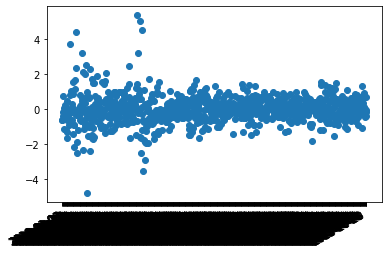

In [18]:
plt.plot_date(x = xnew, y= X[1])
plt.gcf().autofmt_xdate()
plt.show()

In [19]:
# import matplotlib.dates as mdates
# from datetime import date


# def fig_formatter(ax):
#     months = mdates.MonthLocator()
#     myFmt = mdates.DateFormatter('%y/%m')
#     ax.xaxis.set_major_formatter(myFmt)
#     plt.gcf().autofmt_xdate()
#     plt.grid()
#     ax.xaxis.set_minor_locator(months)
#     ax.xaxis.grid(True, 'major', linewidth=1)
#     ax.xaxis.grid(True, 'minor', linewidth=0.5)

# # x_data = [date(2017, 1, 1), date(2017, 5, 1), date(2017, 12, 1)]
# # y_data = [5, 30, 10]
# # plt.plot_date(x_data, y_data, '-o')



In [20]:
# index = pd.date_range(start="2020-07-01", end="2021-01-01", freq="D")
# index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]

# data = np.random.randint(1, 100, size=len(index))

# df = pd.DataFrame(data=data, index=index, columns=['data'])

# ax = df.plot()
# index = pd.date_range(start="2010-07-01", end="2015-01-01", freq="3M")
# index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]

# plt.gcf().autofmt_xdate()


In [32]:
# plt.figure(figsize = (20,10))

# # index = pd.date_range(start="2010-07-01", end="2015-01-01", freq="3M")
# # index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]

# for i in range(X.shape[0]):
#     sns.lineplot(x = xnew, y= X[i])
# plt.gcf().autofmt_xdate()




# ax = plt.subplot(111)
# #fig_formatter(ax)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# plt.show()    




In [33]:
df.iloc[:,1:].columns.astype

<bound method Index.astype of Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', name=0, length=963)>

In [34]:
pd.to_datetime(df.iloc[:,1:].columns)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21',
               '2013-10-22', '2013-10-23', '2013-10-24', '2013-10-25',
               '2013-10-28', '2013-10-29'],
              dtype='datetime64[ns]', name=0, length=963, freq=None)

## Clustering stocks using KMeans

In [35]:
normalizer = Normalizer()

In [36]:
kmeans = KMeans(n_clusters=10)

In [37]:
# pipe = Pipeline([('scaler', Normalizer()), ('svc', KMeans())])
pipeline1 = make_pipeline(normalizer, kmeans)

In [38]:
labels = pipeline1.fit_predict(X)

In [39]:
labels

array([6, 7, 6, 7, 4, 7, 3, 2, 0, 1, 3, 2, 3, 0, 9, 7, 5, 6, 7, 3, 9, 2,
       9, 9, 9, 1, 7, 1, 8, 4, 9, 8, 9, 9, 2, 0, 4, 3, 8, 5, 1, 8, 3, 3,
       0, 2, 3, 9, 2, 3, 9, 0, 3, 0, 4, 7, 1, 3, 5, 9], dtype=int32)

In [40]:
# pd.DataFrame({'labels':labels, 'companies':df.iloc[:,0]})

In [68]:
inertia = []

for i in list(range(1,20)):
    
    scalor = StandardScaler()
    kmeans = KMeans(n_clusters=i).fit(scalor.fit_transform(X))

    inertia.append(kmeans.inertia_)

  
    
print(inertia)    

[57780.000000000015, 38971.711992653734, 28073.173108599934, 18804.839402763027, 13367.69801002385, 10843.401836811581, 9493.708409748728, 8600.97091621478, 8090.720078370095, 7527.108165505575, 7033.558444772547, 6534.9286064249, 6112.277280592233, 5655.303230153916, 5462.045731782158, 4890.937400007698, 4622.151493620374, 4314.494449808605, 4116.633634296369]


In [69]:
z = list(range(1,20))

In [70]:
len(inertia)

19

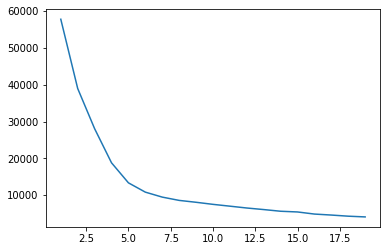

In [71]:
plt.plot(z, inertia)
plt.show()

In [72]:
# scalor = StandardScaler()

In [87]:
normalizer = Normalizer()

In [88]:
kmeans = KMeans(n_clusters=5)

In [89]:
pipeline1 = make_pipeline(scalor, kmeans)

In [90]:
pipeline2 = make_pipeline(normalizer, kmeans)

In [82]:
labels1 = pipeline1.fit_predict(X)

In [91]:
labels2 = pipeline2.fit_predict(X)

In [83]:
labels1

array([3, 1, 5, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 6, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [92]:
labels2

array([3, 0, 3, 0, 0, 4, 0, 4, 0, 2, 0, 3, 0, 0, 3, 4, 0, 3, 4, 0, 0, 4,
       3, 0, 3, 1, 4, 2, 1, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 1, 2, 2, 0, 0,
       0, 4, 0, 3, 4, 0, 3, 3, 0, 0, 1, 4, 2, 0, 3, 3], dtype=int32)

In [86]:
# pd.DataFrame({'labels':labels1, 'companies':df.iloc[:,0]}).sort_values('labels')

In [94]:
df2 = pd.DataFrame({'labels':labels2, 'companies':df.iloc[:,0]}).sort_values('labels')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


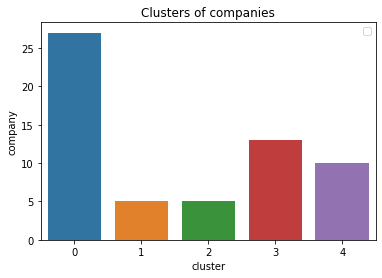

In [96]:
sns.countplot(x='labels', data=df2)

plt.title('Clusters of companies')
plt.xlabel('cluster')
plt.ylabel('company')
plt.legend()
plt.show()

<AxesSubplot:xlabel='labels', ylabel='companies'>

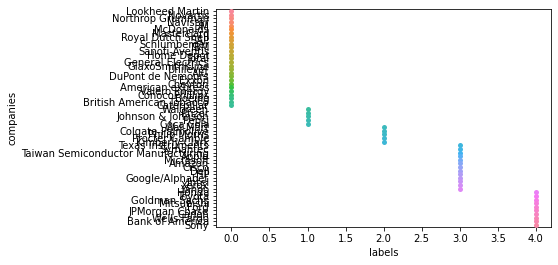

In [97]:
sns.swarmplot(x="labels", y="companies", data=df2)

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)